## Building Deep Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs , make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [3]:
def dnn_architecture(X, y):
    
    """
    Asks for user input to define the architecture of a deep neural network.
    
    Args:
    X (ndarray): The input data of shape (input_size, m), where input_size is the number of features
                     and m is the number of training examples.
    y (ndarray): The target labels of shape (output_size, m), where output_size is the number of classes
                     and m is the number of training examples.
    
    Returns:
    dimensions (list): A list containing the dimensions of the arrays for each hidden layer in the network.
    Each element in the list represents the number of neurons in the corresponding layer.
    The first element represents the number of input features in the input layer, followed by
    the number of neurons in each hidden layer.
    
    Note:
    This function prompts the user to enter the desired number of layers and the number of neurons in each layer
    (excluding the input and output layer). The function then returns a list of dimensions, which can be used
    to define the architecture of the deep neural network. It will also be used later in the init_dl function.
    """
    
    # number of total layers excluding input  and output layer
    
    nb_layers = int(input("enter the number of hidden layers you desire to put in your deep neural network"))
    
    # dimensions array is to store the number of neurons of each layer also number of input features
    
    dimensions =[]
    
    # for loop on hidden layers only
    
    for i in range(nb_layers) :
            
       # for hidden layers
 
            nb_hidden_layers = int(input("enter the number of lneurals you desire to put in the {} th layer".format(i+1)))
            dimensions.append(nb_hidden_layers)
            
            
       # wih each iteration and in each case we append the dimensions list respectively to keep the order of layers
    
        
    # insert the input layer in position 0
    
    dimensions.insert(0, X.shape[0])
    
    # append the output layer to dimensions
    
    dimensions.append(y.shape[0])
    
    return dimensions

In [6]:
a

[2, 10, 50, 120, 1]

In [9]:
def init_dl(dimensions):
    
    """
    Initializes the parameters of a deep neural network based on the given dimensions.
    
    Args:
    dimensions (list): A list containing the dimensions of the arrays for each layer in the network.
    Each element in the list represents the number of neurons in the corresponding layer.
    For example, for a network with n layers, the dimensions list will have n+2 elements,
    where the first element is the input dimension and the last element is the output dimension.
    
    Returns:
    parameters (dict): A dictionary containing the initialized parameters of the network.
    The keys of the dictionary represent the layer order, and the values are the initialized
    weight matrices and bias vectors for each layer. The shape of the weight matrices will
    be R(ni x n(i-1)), where ni is the number of neurons in the current layer and n(i-1) is
    the number of neurons in the previous layer.
    
    Note:
    The number of parameters in the network can be deduced from the number of layers (n) as 2*n.
    """
    
    # we initialize N as the len of dimensions
    
    N = len(dimensions)
    parameters = {}
    
    for i in range(1,N): 
        
        # storing value Wi in a dictionnary with shape(ith layer,"i-1"th layer)
        # dimensions(i) represent the number of neural in current layer and dimensions(i-1) number
        # of neural in previous layer. NB: if i=1 dimensions(i-1) represents number of input features 
        
        parameters["W"+str(i)] = np.random.randn(dimensions[i],dimensions[i-1])
        
        # same logic is applicable to the biais that is in all cases a vector
        
        parameters["b"+str(i)] = np.random.randn(dimensions[i],1)
        
    return parameters

# we must not forget that we will apply a transpose to our Wi matrix later
# like what we did in 2layers code, in order to make the dot product possible

In [11]:
b

{'W1': array([[ 0.57449896, -0.43171238],
        [ 1.4988324 ,  1.65714466],
        [ 0.51954155,  0.95288559],
        [ 0.29348592, -0.25928915],
        [ 1.08699871, -2.0237977 ],
        [-0.05732422,  0.00356909],
        [ 0.19084422, -0.74684245]]),
 'b1': array([[ 0.79826431],
        [-0.21454619],
        [-0.29454813],
        [-0.32018399],
        [-1.37081402],
        [ 0.22499986],
        [ 0.68687855]]),
 'W2': array([[ 1.08849617, -0.79250705, -0.04993504,  0.75249346,  1.91101971,
         -1.0667166 , -0.3598867 ],
        [-1.44825005, -1.72221734,  1.05715987, -0.68294562,  0.70377928,
         -0.32246466,  0.02225763],
        [-1.25000813, -0.35274934, -0.83905715, -1.00179711, -0.31568369,
          1.21416963,  0.14865031],
        [ 2.17334999, -0.88144988,  0.10827437,  0.60495658,  0.58876779,
         -0.23790771, -0.91332559],
        [ 2.22945409, -0.31568298,  1.35472489,  0.7810959 ,  0.79887496,
          0.10940601,  0.73532978],
        [ 0.986

In [16]:
def forward_propagation(X, parameters):
    
    """
    Performs forward propagation in a deep neural network to compute the activations of each layer.

    Args:
        X (array-like): Input data of shape (input_dim, m), where input_dim is the number of input features
            and m is the number of examples in the batch.
        parameters (dict): A dictionary containing the parameters of the neural network.
            The keys of the dictionary represent the layer order, and the values are dictionaries
            containing the weight matrices (keys: "W1", "W2", ..., "WN") and bias vectors
            (keys: "b1", "b2", ..., "bN") for each layer.

    Returns:
        activations (dict): A dictionary containing the activations of each layer in the network.
            The keys of the dictionary represent the layer order, and the values are the activation
            arrays (A1, A2, ..., AN) for each layer. The shape of each activation array is
            (n_i, m), where n_i is the number of neurons in the corresponding layer and m is the
            number of examples in the batch.

    Note:
        This function iterates over the layers of the neural network, starting from the first hidden layer (index 1)
        to the output layer (index N). For each layer, it computes the weighted sum (Z) of the previous layer's
        activations and the corresponding weight matrix, adds the bias vector, and applies the sigmoid activation
        function. The resulting activations are stored in the `activations` dictionary and returned as the output.
    """
    
    # first we initialize a dictionnary that will store activations Ai
    # We will also give this dictionnary a key A0 with value X to solve the first layer problem where Z1 = W1.X + b1
    
    activations = { "A0" : X }
    
    # N-1 is the total number of layers that we will obtain using integer division
    
    N = len(parameters)//2
    
    # this loop will start from 1 since we have already determined W0 to be X and go to N
    
    for i in range(1,N+1) :
        
        # Each loop will compute a function Zi , and the next loop will overwrite the previous Zi to compute Z(i+1)
        
        Z = parameters["W"+str(i)].dot(activations["A"+str(i-1)]) + parameters["b"+str(i)]
        
        # Here we store the activation output using sigmoid function in the activations dict
        
        activations["A"+str(i)] = 1 + (1+np.exp(-Z))
        
    return activations

In [67]:
c = forward_propagation(X,b)

/tmp/ipykernel_31119/2620156903.py:47: RuntimeWarning: overflow encountered in exp
  activations["A"+str(i)] = 1 + (1+np.exp(-Z))


In [63]:
def back_propagation (y, activations, parameters):
    
    """
    Performs backpropagation in a deep neural network to compute the gradients of the parameters.

    Args:
        y (array-like): The true labels or target values of shape (1, m), where m is the number of examples in the batch.
        activations (dict): A dictionary containing the activations of each layer in the network.
                            The keys of the dictionary represent the layer order, and the values are the activation
                            arrays (A1, A2, ..., AN) for each layer.
        parameters (dict): A dictionary containing the parameters of the neural network.
                           The keys of the dictionary represent the layer order, and the values are dictionaries
                           containing the weight matrices (keys: "W1", "W2", ..., "WN") and bias vectors
                           (keys: "b1", "b2", ..., "bN") for each layer.

    Returns:
        gradients (dict): A dictionary containing the gradients of the parameters.
                          The keys of the dictionary represent the layer order, and the values are the gradients
                          of the weight matrices (dW1, dW2, ..., dWN) and bias vectors (db1, db2, ..., dbN) for each layer.

    Note:
        This function performs backpropagation by iterating through the layers of the neural network in reverse order.
        It starts with the last layer and computes the gradients of the parameters using the generalized formulas
        obtained from the two-layer neural network case. The partial derivatives are specific to the sigmoid activation
        function and the log loss function derived from the Bernoulli probability law. The gradients are then stored
        in the `gradients` dictionary and returned as the output.
    """
    
    # initializing the an empty dictionnary gradients
    
    gradients = {}
    
    # this line will help us get the dimensions of the output vector, in other terms size of the data we trained
    # we do it to get 1/m, the scaling factor "1/m" is used to normalize the average gradient, not the individual 
    # gradient updates, and it helps to ensure consistent and stable learning across different dataset sizes. 
    # The actual scaling of the gradient update step is done by the learning rate.
    
    m = y.shape[1] 
    
    N = len(parameters)//2
    
    # this line here is used to initialize the partial derivative of the last layer of our neural network 
    # wich is in fact the first step of our back propagation since we go in reversed path to generate partial derivatives
    
    dZ = activations["A"+str(N)] - y
    
    # Proceeding with reversed for loop in order to go throught the NN from last to first layer
    
    for i in reversed(range(1,N+1)) :
        
        # we intialize A to represent A(i-1), because we noticed that apart from dZN that represents the last layer
        # all of the other equations will use only A(i-1)
        
        A = activations["A" + str(i-1)]
        
        # we generate W to represent Wi because we will use it to compute dZ(i-1)
        
        W = parameters["W" + str(i)]
        
        # we apply the formulas we reached from generalizing the computations we got previously on the 2 layers NN
        
        gradients["dW" + str(i)] =  1/m * np.dot(dZ,A.T)
        
        # same with biais formula we apply the generalized form we got from the 2 layers NN
        
        gradients["db" + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        
        # this line is to update the value of dZ in order to jump to next layer wich is in fact and order of forward propagation
        # the precedent layer of the actual layer. Each iteration new dZ will overwrite the old dZ
        # and we must not forget to apply the condicion on i > 1 beacuse dZ0 doesnt exist, because in iteration i we
        # compute dZ(i-1)
        
        if i > 0 :
            dZ =  np.dot(W.T,dZ) * A * (1-A)    
    
    return gradients

In [65]:
d

{'dW4': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan]]),
 'db4': array([[nan]]),
 'dW3': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'db3': array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]])

In [18]:
def log_loss_func(A, y):
    """
    Compute the logistic loss function for binary classification.

    The logistic loss function, also known as the binary cross-entropy loss, is a common
    cost function used in binary classification tasks. It measures the discrepancy between
    the predicted probabilities (A) and the true labels (y) for binary classification.

    Parameters:
    A (numpy.ndarray): Predicted probabilities of shape (m,) where m is the number of samples.
    y (numpy.ndarray): True labels of shape (m,) where m is the number of samples.

    Returns:
    float: The computed logistic loss.

    Explanation:
    The logistic loss function is derived from the concept of maximum likelihood estimation
    for binary outcomes. By taking the negative log-likelihood of the predicted probabilities
    (A) for the positive class (y=1) and the negative class (y=0), and averaging it across
    all samples, we obtain a measure of the model's performance.

    To avoid vanishing probabilities and numerical instability during computation, the loss
    function is constructed using logarithms. The logarithm helps to compress the range of
    probabilities and prevents multiplication of very small values, which could lead to
    underflow issues. By taking the negative logarithm of the predicted probabilities, we
    penalize large deviations from the true labels and encourage the model to better fit the
    data.

    The logistic loss function is commonly used as the cost function in logistic regression
    and as the final layer's activation function in binary classification neural networks.
    It provides a continuous, differentiable, and interpretable measure of the model's
    performance, allowing for efficient optimization through techniques like gradient
    descent.

    References:
    - Logistic regression: https://en.wikipedia.org/wiki/Logistic_regression
    - Binary cross-entropy loss: https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression
    """
    return (1 / len(y)) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


In [19]:
def update(gradients, parameters, learning_rate):
    """
    Updates the weights and biases of a deep neural network based on the computed gradients.

    Args:
        gradients (dict): A dictionary containing the gradients of the parameters.
                            The keys of the dictionary represent the layer order, and the values are the gradients
                            of the weight matrices (dW1, dW2, ..., dWN) and bias vectors (db1, db2, ..., dbN) for each layer.
        parameters (dict): A dictionary containing the parameters of the neural network.
                            The keys of the dictionary represent the layer order, and the values are dictionaries
                            containing the weight matrices (keys: "W1", "W2", ..., "WN") and bias vectors
                            (keys: "b1", "b2", ..., "bN") for each layer.
        learning_rate (float): The learning rate or step size used for updating the parameters.

    Returns:
        parameters (dict): A dictionary containing the updated parameters of the neural network.
                            The keys of the dictionary represent the layer order, and the values are dictionaries
                            containing the updated weight matrices and bias vectors for each layer.

    Note:
        This function updates the weights and biases of the neural network using the computed gradients.
        It iterates through each layer of the network and performs the parameter updates based on the learning rate
        and corresponding gradient values. The updated parameters are stored in the `parameters` dictionary and
        returned as the output.
    """
    
    N = len(parameters)//2
    
    # again a for loop to update every weight and bias in the whole network respectively to his gradients
    
    for i in range(1,N+1) :
        
        # update weight Wi following gradient dWi
        
        parameters["W" + str(i)] = parameters["W" + str(i)] - learning_rate * gradients["dW" + str(i)]
        
        # update bias bi following gradient dbi
        
        parameters["b" + str(i)] = parameters["b" + str(i)] - learning_rate * gradients["db" + str(i)]
        
    return parameters

In [20]:
def visualization(X, y, parameters, ax):
    """
    Visualizes the training progress of the deep neural network.

    Args:
        X (ndarray): The input data of shape (input_size, m), where input_size is the number of features
                     and m is the number of training examples.
        y (ndarray): The target labels of shape (output_size, m), where output_size is the number of classes
                     and m is the number of training examples.
        parameters (dict): A dictionary containing the trained parameters of the neural network.
                           The keys of the dictionary represent the layer order, and the values are dictionaries
                           containing the weight matrices and bias vectors for each layer.
        ax (AxesSubplot): The axes to plot the visualization.

    Returns:
        None

    """

    # Perform forward propagation to get the final activations
    activations = forward_propagation(X, parameters)
    A_final = activations['A' + str(len(parameters) // 2)]

    # Scatter plot of the input data
    ax[2].scatter(X[0, :], X[1, :], c=y.flatten(), cmap='coolwarm', edgecolors='k')
    ax[2].set_xlabel('X1')
    ax[2].set_ylabel('X2')
    ax[2].set_title('Input Data')

    # Plot the decision boundary
    x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
    x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
    input_data = np.vstack((xx1.ravel(), xx2.ravel()))
    Z = predict(input_data, parameters)
    Z = Z.reshape(xx1.shape)
    ax[2].contourf(xx1, xx2, Z, alpha=0.4, cmap='coolwarm')
    ax[2].set_xlim(xx1.min(), xx1.max())
    ax[2].set_ylim(xx2.min(), xx2.max())
    ax[2].set_title('Decision Boundary')

    # Plot the loss curve
    ax[0].plot(loss_list, label="Log Loss training curve")
    ax[0].set_xlabel('Iteration')
    ax[0].set_ylabel('Log Loss')
    ax[0].set_title('Training Loss')

    # Plot the accuracy curve
    ax[1].plot(acc_list, label="Accuracy training curve")
    ax[1].set_xlabel('Iteration')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Training Accuracy')

    # Show legend for all plots
    ax[0].legend()
    ax[1].legend()

    plt.tight_layout()

    return None


In [44]:
def deep_neural_network(X, y, learning_rate = 0.001, n_iter = 1000):
    """
    Trains a deep neural network using forward propagation, backpropagation, and gradient descent.

    Args:
        X (ndarray): The input data of shape (input_size, m), where input_size is the number of features
                     and m is the number of training examples.
        y (ndarray): The target labels of shape (output_size, m), where output_size is the number of classes
                     and m is the number of training examples.
        learning_rate (float, optional): The learning rate or step size used for updating the parameters during gradient descent.
                                          Defaults to 0.001.
        n_iter (int, optional): The number of iterations or epochs to train the neural network. Defaults to 1000.

    Returns:
        parameters (dict): A dictionary containing the trained parameters of the neural network.
                           The keys of the dictionary represent the layer order, and the values are dictionaries
                           containing the weight matrices and bias vectors for each layer.

    Note:
        This function trains a deep neural network by performing forward propagation, backpropagation, and gradient descent.
        It initializes the parameters, performs the specified number of iterations, and updates the parameters
        in each iteration based on the computed gradients. The training progress is visualized by plotting the
        log loss and accuracy curves over iterations.

        The function returns the trained parameters that can be used for making predictions.

    """
    
    np.random.seed(1)
    
    # initializing the parameters
    
    dimensions = dnn_architecture()
    
    # generate parameters using initialization function
    
    parameters = init_dl(X, y, dimensions)
    
    # initialize two empty lists that will store values of loss function and accuracy

    loss_list = []
    acc_list = []

    # gradient descent algorithm where in each iteration we do a forwad prop, a back prop and an update of the parameters
    # tqdm is a library that put a progress bar on the progression , it's derived from arabic "taqadom" wich means progressoin
    
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parameters)
        gradients = back_propagation(y, parameters, activations)
        parameters = update(gradients, parameters, learning_rate)
        
        # compute the final value of output layer in activations so we use it later in comparison of log_loss 
        
        N = len(parameters)//2
        A_final = activations['A' + str(N)]
        
        # each ten iterations we will compute the log_loss between y and activations of output layer and in parallel
        # we also analyze the accuracy between predicted values and y
        
        if i%10 == 0 :
            
            # compute log_loss to see the difference of activations from labeled dataset
            
            loss_list.append(log_loss(y,A_final))
            y_pred = predict(X,parameters)
            
            # compute the current accuracy of the model
            
            accuracy = accuracy_score(y.flatten(),y_pred.flatten())
            acc_list.append(accuracy)
            

    # plotting training curves
    
    fig , ax = plt.subplots(nrows=1 , ncols=3 , figsize=(18,4))
    ax[0].plot(loss_list, label="Log Loss training curve")
    ax[0].legend
    
    ax[1].plot(acc_list, label="Accuracy training curve")
    ax[1].legend
    
    visualization(X, y, parameters, ax)
    plt.show()

    return parameters

## Dataset


dimensions de X: (2, 100)
dimensions de y: (1, 100)


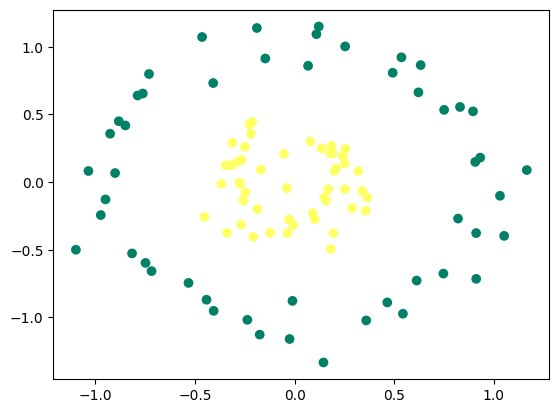

In [4]:
# Now we generate the dataset to test our Deep Neural Network 

X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [45]:
deep_neural_network(X, y, learning_rate = 0.001, n_iter = 1000)


enter the number of hidden layers you desire to put in your deep neural network3
enter the number of lneurals you desire to put in the 1 th layer32
enter the number of lneurals you desire to put in the 2 th layer64
enter the number of lneurals you desire to put in the 3 th layer32


  0%|                                                  | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_31119/2620156903.py:47: RuntimeWarning: overflow encountered in exp
  activations["A"+str(i)] = 1 + (1+np.exp(-Z))
  0%|                                                  | 0/1000 [00:00<?, ?it/s]


KeyError: 'A2'